### Load Important Modules

In [54]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [55]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import CVScores

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
### ML Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Feature Engineering

In [57]:
df = pd.read_csv('../Dataset/Dis2.csv')
df.head(5)

,Y,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
0,1,38,43,2,10,11,22,7,45,24,36,16,29,32,88,18
1,1,57,52,2,10,26,31,11,30,23,12,22,29,28,88,10
2,1,57,52,2,10,26,31,11,45,30,17,36,29,28,88,10
3,1,38,43,2,10,26,6,7,16,23,17,22,29,28,88,10
4,1,38,43,2,10,26,31,15,45,30,17,36,29,28,88,10


In [58]:
df.columns

Index(['Y', 'PROFILE', 'PLAN', 'CHANGE', 'LANDUSE', 'ELEVATION', 'SLOPE',
       'ASPECT', 'TWI', 'SPI', 'DRAINAGE', 'NDVI', 'RAINFALL', 'FAULTLINES',
       'ROAD', 'GEOLOGY'],
      dtype='object')

### Feature and Target Variable Split

In [59]:
X = df.drop(["Y"], axis=1)

In [60]:
X.head(2)

,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
0,38,43,2,10,11,22,7,45,24,36,16,29,32,88,18
1,57,52,2,10,26,31,11,30,23,12,22,29,28,88,10


In [61]:
y = df[['Y']]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PROFILE     392 non-null    int64
 1   PLAN        392 non-null    int64
 2   CHANGE      392 non-null    int64
 3   LANDUSE     392 non-null    int64
 4   ELEVATION   392 non-null    int64
 5   SLOPE       392 non-null    int64
 6   ASPECT      392 non-null    int64
 7   TWI         392 non-null    int64
 8   SPI         392 non-null    int64
 9   DRAINAGE    392 non-null    int64
 10  NDVI        392 non-null    int64
 11  RAINFALL    392 non-null    int64
 12  FAULTLINES  392 non-null    int64
 13  ROAD        392 non-null    int64
 14  GEOLOGY     392 non-null    int64
dtypes: int64(15)
memory usage: 46.1 KB


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15, stratify= y)

In [72]:
X_train.shape

(262, 15)

In [73]:
X_test.shape

(130, 15)

## ML Models

In [12]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

In [13]:
def tune_model(classifier, param_grid, X, y ):
  grid = GridSearchCV(classifier, param_grid, refit = True, cv =cv, verbose = 3, n_jobs=4) 
  # fitting the model for grid search 
  grid = grid.fit(X, y)
  return grid 

### Model 1 - Logistic Regression

In [35]:
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              'penalty':['l1', 'l2', 'elasticnet']}

In [39]:
lR = tune_model(LogisticRegression(), param_grid, X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    2.8s finished


In [117]:
lR = LogisticRegression(penalty='l2', solver= 'newton-cg', C= 0.01).fit(X_train_red, y_train)

In [40]:
# print best parameter after tuning 
print(lR.best_params_)
print(lR.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9155270655270655


In [41]:
lR = lR.best_estimator_

In [42]:
lR.fit(X_train_red, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

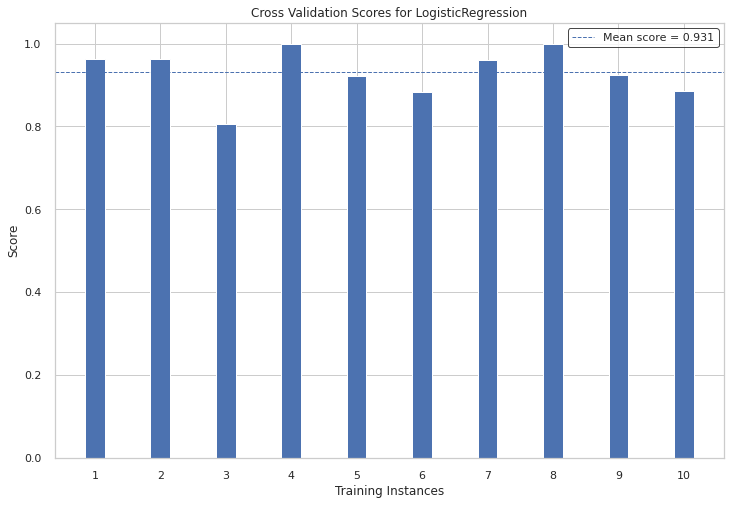

In [118]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
visualizer = CVScores(lR, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()

In [82]:
from sklearn.metrics import classification_report
y_test_pred = lR.predict(X_test_red)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.8873    0.9692    0.9265        65
           1     0.9661    0.8769    0.9194        65

    accuracy                         0.9231       130
   macro avg     0.9267    0.9231    0.9229       130
weighted avg     0.9267    0.9231    0.9229       130



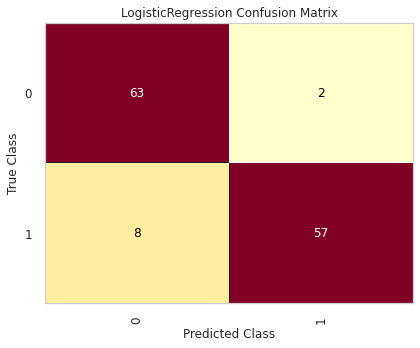

In [83]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    lR,
    X_test_red, y_test,
    is_fitted=True
)
visualizer.show();

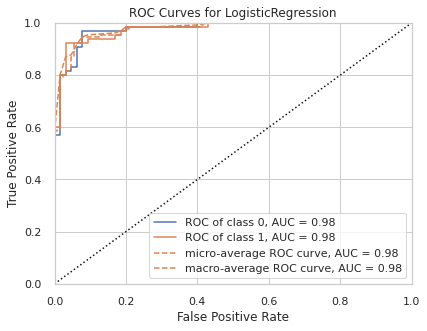

In [84]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    lR,
    is_fitted=True
)
visualizer.fit(X_train_red, y_train)
visualizer.score(X_test_red, y_test)
visualizer.show()

### KNN

In [33]:
# defining parameter range 
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13],  
              'p': [1, 2]}

In [34]:
knn = tune_model(KNeighborsClassifier(), param_grid, X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.5s finished


In [35]:
# print best parameter after tuning 
print(knn.best_params_)
print(knn.best_score_)

{'n_neighbors': 7, 'p': 1}
0.9121082621082621


In [36]:
knn = knn.best_estimator_

In [86]:
knn = KNeighborsClassifier(n_neighbors=7, p=1).fit(X_train_red, y_train)

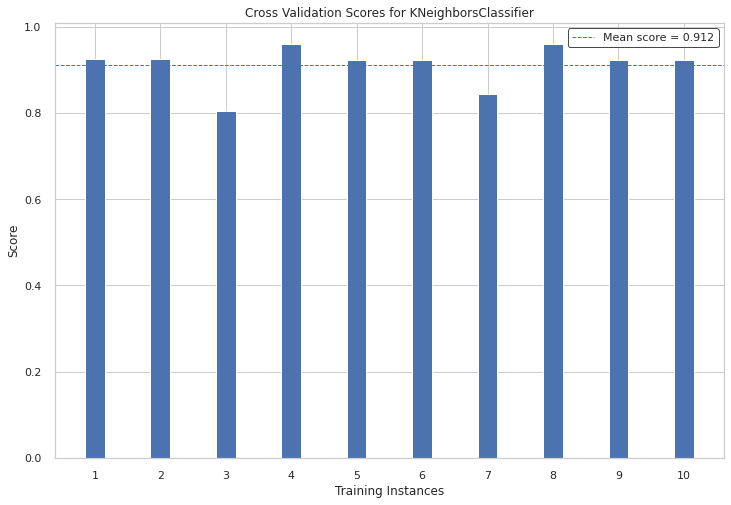

In [97]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
visualizer = CVScores(knn, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()

In [88]:
from sklearn.metrics import classification_report
y_test_pred = knn.predict(X_test_red)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.9167    0.8462    0.8800        65
           1     0.8571    0.9231    0.8889        65

    accuracy                         0.8846       130
   macro avg     0.8869    0.8846    0.8844       130
weighted avg     0.8869    0.8846    0.8844       130



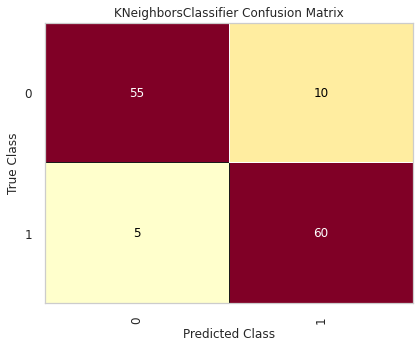

In [89]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    knn,
    X_test_red, y_test,
    is_fitted=True
)
visualizer.show();

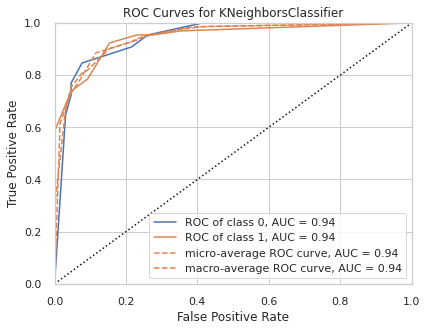

In [90]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    knn,
    is_fitted=True
)
visualizer.fit(X_train_red, y_train)
visualizer.score(X_test_red, y_test)
visualizer.show()

###  Adaboost


In [45]:
# defining parameter range 
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2, 0.3, 0.5, 1],  
              'n_estimators': [10, 50, 100, 500, 1000, 1500, 3000]}

In [46]:
ada = tune_model(AdaBoostClassifier(), param_grid, X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:   47.8s
[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 520 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:  4.1min finished


In [91]:
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=1).fit(X_train_red, y_train)

In [47]:
# print best parameter after tuning 
print(ada.best_params_)
print(ada.best_score_)

{'learning_rate': 1, 'n_estimators': 1000}
0.915954415954416


In [48]:
ada = ada.best_estimator_

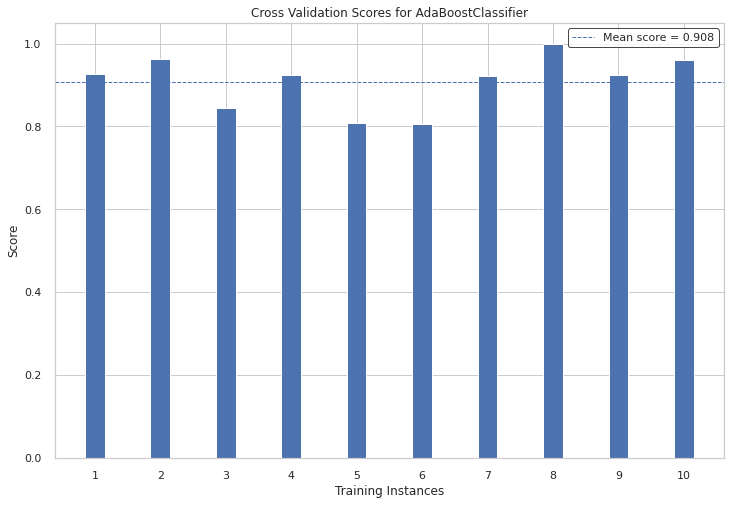

In [92]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
visualizer = CVScores(ada, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()

In [93]:
from sklearn.metrics import classification_report
y_test_pred = ada.predict(X_test_red)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.8529    0.8923    0.8722        65
           1     0.8871    0.8462    0.8661        65

    accuracy                         0.8692       130
   macro avg     0.8700    0.8692    0.8692       130
weighted avg     0.8700    0.8692    0.8692       130



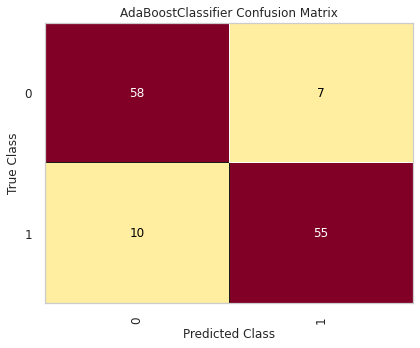

In [94]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    ada,
    X_test_red, y_test,
    is_fitted=True
)
visualizer.show();

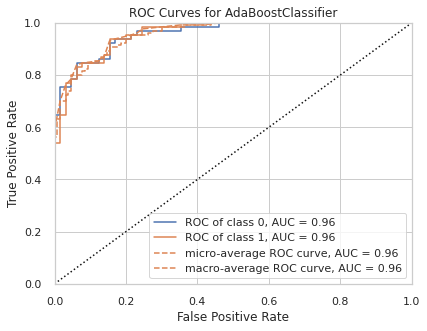

In [95]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    ada,
    is_fitted=True
)
visualizer.fit(X_train_red, y_train)
visualizer.score(X_test_red, y_test)
visualizer.show()

### Support Vector Machine

In [14]:
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf'],
              'probability':[True]}

In [15]:
svm = tune_model(SVC(), param_grid, X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  6.4min finished


In [109]:
svm = SVC(C=10, gamma='scale', kernel='rbf', probability=True)

In [110]:
svm.fit(X_train_red, y_train)

SVC(C=10, probability=True)

In [16]:
# print best parameter after tuning 
print(svm.best_params_)
print(svm.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
0.931054131054131


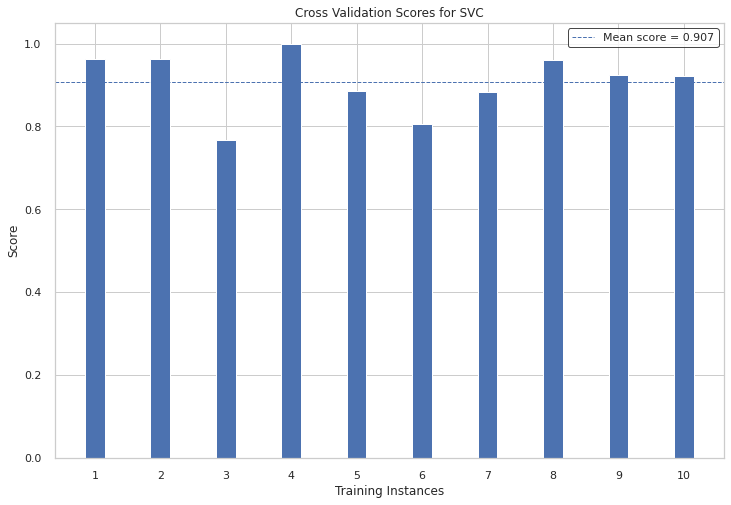

In [113]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
visualizer = CVScores(svm, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()

In [1]:
# svm = svm.best_estimator_

In [104]:
from sklearn.metrics import classification_report
y_test_pred = svm.predict(X_test_red)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.9032    0.8615    0.8819        65
           1     0.8676    0.9077    0.8872        65

    accuracy                         0.8846       130
   macro avg     0.8854    0.8846    0.8846       130
weighted avg     0.8854    0.8846    0.8846       130



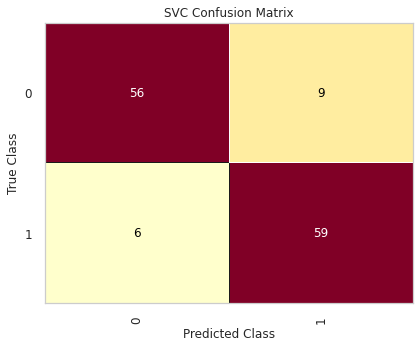

In [106]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    svm,
    X_test_red, y_test,
    is_fitted=True
)
visualizer.show();

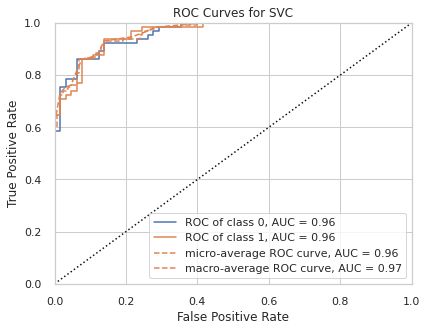

In [108]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    svm,
    is_fitted=True
)
visualizer.fit(X_train_red, y_train)
visualizer.score(X_test_red, y_test)
visualizer.show()

### XgBoost

In [122]:
# defining parameter range 
param_grid = {'max_depth': [2,3,5,6,8],  
              'n_estimators': [500, 1500, 3000, 5000], 
              'learning_rate':[0.01, 0.1, 0.05, 0.3, 0.5],
              'gamma':[0, 0.1, 0.5, 1, 2],
              'subsample': [0.5, 0.7, 0.8, 0.9, 1],
              'n_jobs': [4]   
}

In [125]:
xgb_tuned = tune_model(XGBClassifier(), param_grid, X_train, y_train)

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 19.9min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 24.9min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 30.2min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 35.4min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 41.6min
[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed: 48.3min
[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 57.3min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 66.6min


In [126]:
# print best parameter after tuning 
print(xgb_tuned.best_params_)
print(xgb_tuned.best_score_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 3000, 'n_jobs': 4, 'subsample': 0.7}
0.9462962962962964


In [128]:
cv_results_xgb = pd.DataFrame.from_dict(xgb_tuned.cv_results_)

In [129]:
cv_results_xgb.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_n_jobs,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.281839,0.163358,0.004980,0.003255,0,0.01,2,500,4,0.5,...,1.0,0.884615,0.884615,0.884615,1.0,0.923077,0.923077,0.923362,0.057242,1153
1,0.278144,0.102997,0.004812,0.002104,0,0.01,2,500,4,0.7,...,1.0,0.923077,0.846154,0.884615,1.0,0.923077,0.923077,0.919516,0.067790,1616


In [376]:
cv_results_xgb[cv_results_xgb['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_n_jobs,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
131,2.821554,0.641812,0.009445,0.003740,0,0.1,3,3000,4,0.7,...,1.0,0.923077,0.846154,0.923077,1.0,1.000000,0.961538,0.946296,0.057604,1
186,1.077301,0.208142,0.009069,0.004242,0,0.1,8,1500,4,0.7,...,1.0,0.923077,0.846154,0.923077,1.0,1.000000,0.961538,0.946296,0.057604,1
308,0.807664,0.171160,0.007285,0.002777,0,0.3,2,1500,4,0.9,...,1.0,0.923077,0.846154,1.000000,1.0,0.923077,0.961538,0.946296,0.057604,1
313,2.746796,0.764571,0.009185,0.005893,0,0.3,2,3000,4,0.9,...,1.0,0.923077,0.846154,1.000000,1.0,0.923077,0.961538,0.946296,0.057604,1
318,3.199423,0.622852,0.009007,0.005231,0,0.3,2,5000,4,0.9,...,1.0,0.884615,0.846154,1.000000,1.0,0.961538,0.961538,0.946296,0.060117,1


In [130]:
cv_results_xgb.to_excel ("xgb_results.xlsx", index = False, header=True)

In [479]:
xgb = xgb_tuned.best_estimator_

In [480]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [481]:
from sklearn.metrics import classification_report
y_test_pred = xgb_tuned.best_estimator_.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.9091    0.9231    0.9160        65
           1     0.9219    0.9077    0.9147        65

    accuracy                         0.9154       130
   macro avg     0.9155    0.9154    0.9154       130
weighted avg     0.9155    0.9154    0.9154       130



## Untuned XgBoost

In [39]:
xgb_clf = XGBClassifier(max_depth=2, n_estimators=3000, learning_rate=0.01, scale_pos_weight=1, 
                        importance_type='gain', random_state= 0, subsample=1, n_jobs=-1)

In [40]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

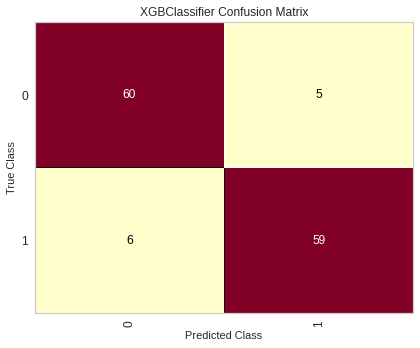

In [41]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    xgb_clf,
    X_test, y_test,
    is_fitted=True
)
visualizer.show();

In [42]:
from sklearn.metrics import classification_report
y_test_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.9091    0.9231    0.9160        65
           1     0.9219    0.9077    0.9147        65

    accuracy                         0.9154       130
   macro avg     0.9155    0.9154    0.9154       130
weighted avg     0.9155    0.9154    0.9154       130



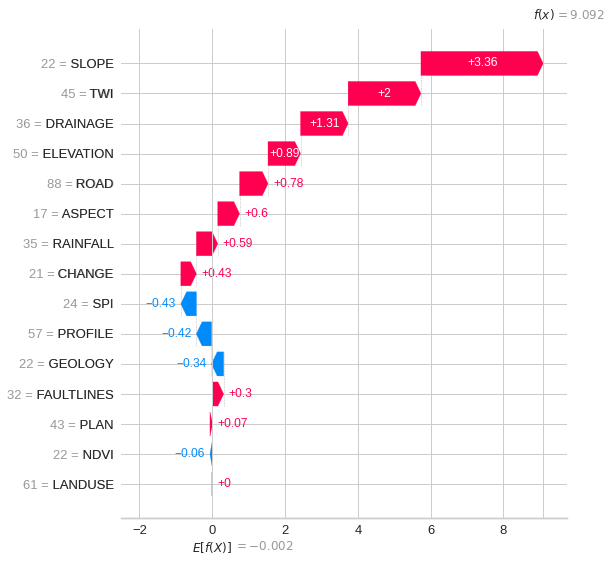

In [43]:
import shap
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1], max_display=15)

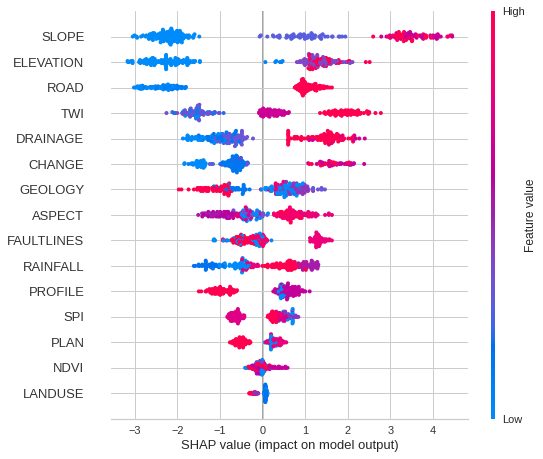

In [223]:
# summarize the effects of all the features
explainer = shap.Explainer(xgb_tuned.best_estimator_)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values , order=shap_values.abs.max(0), max_display=15)

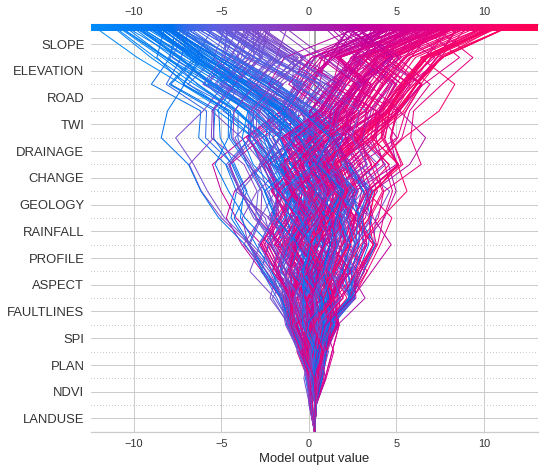

In [224]:
# Create a decision plot
shap.decision_plot(explainer.expected_value, explainer.shap_values(X_train), X_train.columns)

In [226]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values[2],feature_names=X.columns)

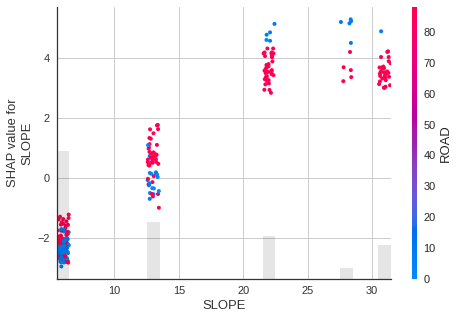

In [32]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"SLOPE"], color=shap_values)

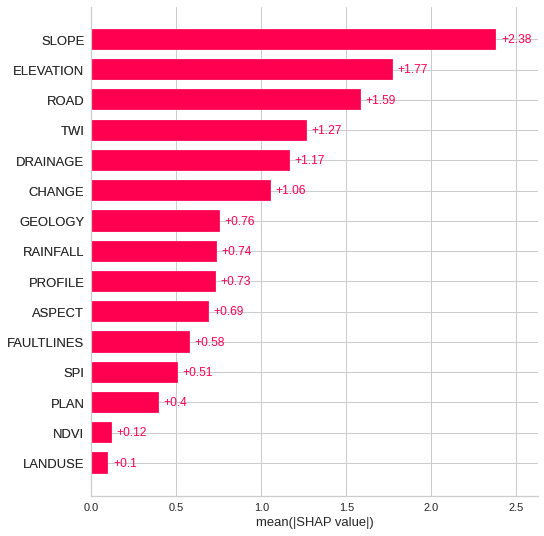

In [325]:
shap.plots.bar(shap_values, max_display=15)

In [62]:
shap.initjs()
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(xgb_clf.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

Using 262 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### Feature Reducted XgBoost

In [74]:
X_train_red = X_train[['PROFILE', 
                #'PLAN', 
                'CHANGE', 
                #'LANDUSE', 
                'ELEVATION', 
                'SLOPE',
                #'ASPECT',
                'TWI',
                #'SPI',
                'DRAINAGE',
                #'NDVI',
                'RAINFALL',
                #'FAULTLINES',
                'ROAD',
                'GEOLOGY'
]]

In [75]:
X_test_red = X_test[['PROFILE', 
                #'PLAN', 
                'CHANGE', 
                #'LANDUSE', 
                'ELEVATION', 
                'SLOPE',
                #'ASPECT',
                'TWI',
                #'SPI',
                'DRAINAGE',
                #'NDVI',
                'RAINFALL',
                #'FAULTLINES',
                'ROAD',
                'GEOLOGY'
]]

In [504]:
# xgb_test = XGBClassifier(max_depth=2, n_estimators=3000, learning_rate=0.01, scale_pos_weight=1, 
#                         importance_type='gain', random_state= 0, subsample=1, n_jobs=-1)

In [424]:
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 3000, 'n_jobs': 4, 'subsample': 0.7}

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 3000,
 'n_jobs': 4,
 'subsample': 0.7}

In [76]:
xgb_test = XGBClassifier(max_depth=3, n_estimators=3000, learning_rate=0.1, gamma=0, random_state= 0, subsample=0.7, n_jobs=4)

In [506]:
xgb_test = xgb_tuned.best_estimator_

In [77]:
xgb_test.fit(X_train_red, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

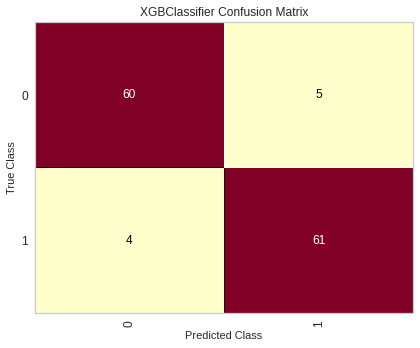

In [508]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(6, 5))
visualizer = confusion_matrix(
    xgb_test,
    X_test_red, y_test,
    is_fitted=True
)
visualizer.show();

In [509]:
from sklearn.metrics import classification_report
y_test_pred = xgb_test.predict(X_test_red)
print(classification_report(y_test, y_test_pred, digits=4))
del y_test_pred

              precision    recall  f1-score   support

           0     0.9375    0.9231    0.9302        65
           1     0.9242    0.9385    0.9313        65

    accuracy                         0.9308       130
   macro avg     0.9309    0.9308    0.9308       130
weighted avg     0.9309    0.9308    0.9308       130



In [501]:
print(sum(cross_val_score(xgb_test, X_train_red, y_train, cv=cv))/10)

0.9349002849002849


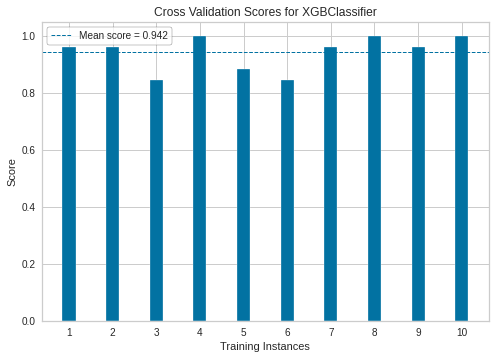

In [478]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
visualizer = CVScores(xgb_test, cv=cv, scoring='f1_weighted', is_fitted=True, stratify = True)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()    

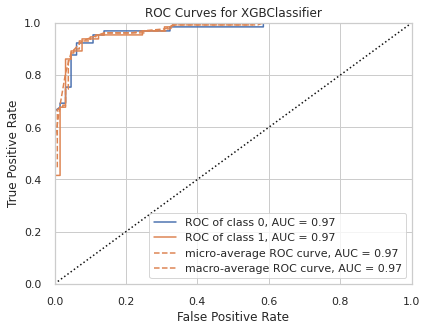

In [85]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    xgb_test,
    is_fitted=True
)
visualizer.fit(X_train_red, y_train)
visualizer.score(X_test_red, y_test)
visualizer.show()

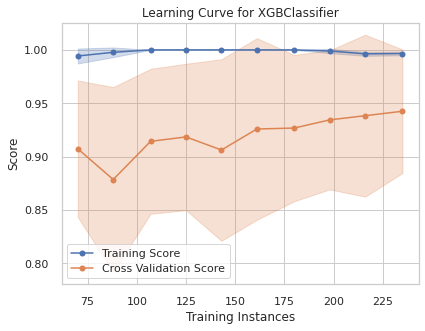

In [80]:
from yellowbrick.model_selection import LearningCurve
plt.figure(figsize=(6.4, 4.8))
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    xgb_test, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show()